## Setup

In [1]:
from tensorflow.keras.models import load_model
import numpy as np 
import matplotlib.pyplot as plt

from hot_dust import preprocess

In [2]:
ds = preprocess.prepare_training_data()
train, validate, test = preprocess.to_tensorflow(preprocess.split_training_data(ds))
batch_size = 2**10
test = test.batch(batch_size)

## Model Summary

In [3]:
network = load_model("data/network")
network.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 11)]              0         
                                                                 
 normalization (Normalizatio  (None, 11)               23        
 n)                                                              
                                                                 
 dense (Dense)               (None, 32)                384       
                                                                 
 dense_3 (Dense)             (None, 8)                 264       
                                                                 
 dense_4 (Dense)             (None, 1)                 9         
                                                                 
Total params: 680
Trainable params: 657
Non-trainable params: 23
______________________________________________________________

## Metrics

In [4]:
# TODO calculate metrics (.eg MSE, R2) on test data and tabulate

## Plots

1/1 [==============================] - 0s 10ms/step


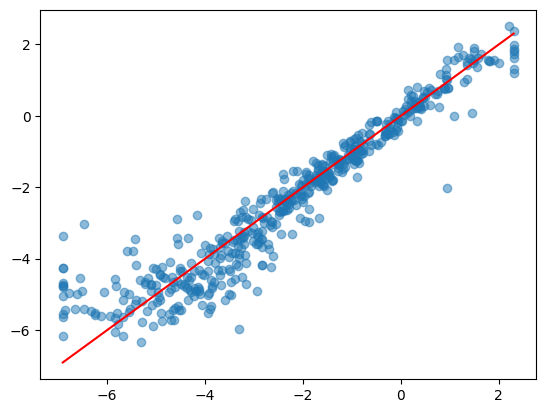

In [10]:
# TODO plot of y_hat against y, with a one-to-one line overlayed
y = np.concatenate(list(i[1] for i in test.as_numpy_iterator()))
y_hat = network.predict(test).reshape((-1,)) 

# plot y_hat against y 
plt.scatter(y, y_hat, alpha=0.5) 
# one-to-one line overlay 
plt.plot([min(y), max(y)], [min(y), max(y)], color='red') 

(array([ 1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         2.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  2.,  1.,  1.,  1.,  0.,
         3.,  0.,  2.,  2.,  0.,  0.,  1.,  2.,  2.,  2.,  1.,  1.,  2.,
         1.,  1.,  1.,  3.,  6.,  3., 10.,  5., 13., 15., 19., 16., 20.,
        31., 32., 31., 30., 40., 33., 38., 23., 17., 11.,  6.,  7.,  9.,
         7.,  8.,  9.,  6.,  4.,  5.,  6.,  3.,  1.,  3.,  2.,  1.,  2.,
         5.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  1.]),
 array([-3.54908752, -3.48401594, -3.41894436, -3.35387254, -3.28880095,
        -3.22372937, -3.15865779, -3.09358597, -3.02851439, -2.9634428 ,
        -2.89837122, -2.83329964, -2.76822782, -2.70315623, -2.63808465,
        -2.57301307, -2.50794125, -2.44286966, -2.37779808, -2.3127265 ,
        -2.24765491, -2.18258309, -2.11751151, -2.05243993, -1.98736823,
        -1.92229664, -1.85722506, -1.79215336, -1.72708178, -1.662010

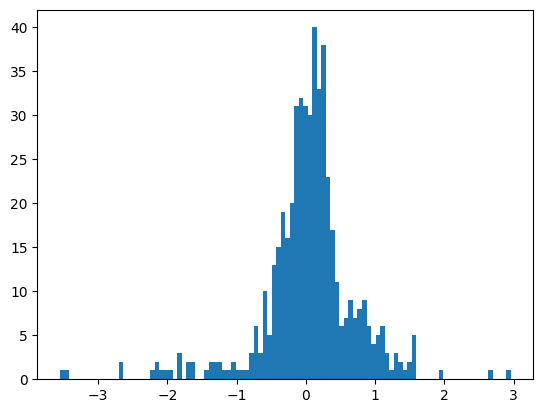

In [13]:
# TODO plot a histogram of the residuals (y = y_hat + residual) 
residual = y - y_hat  
num_bins = 100 
plt.hist(residual, num_bins)



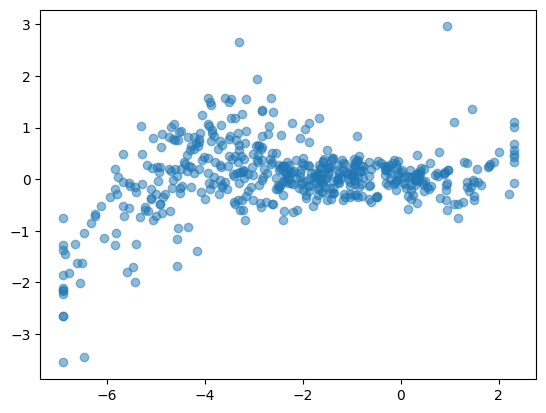

In [9]:
# TODO plot of the residuals against y 
plt.scatter(y, residual, alpha=0.5) 
